In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Polinomios de Lagrange

Partiendo de una función $f(x)$ desconocida dada en forma tabular $([x_0,f(x_0)],[x_1,f(x_1)]\ldots[x_n,f(x_n)])$, y asumiendo que un polinomio $p(x)$ de primer grado se puede escribir de la forma siguiente:

$$p(x)=a_0\,(x-x_1) + a_1\,(x-x0) $$

donde $x_1$ y $x_0$ son puntos conocidos y $a_0$ y $a_1$ son los coeficientes que se desean determinar.

> Resolviendo para $a_0$, se considera $x = x_0$.

$$a_0 = \dfrac{p(x_0)}{x_0 - x_1} = \dfrac{f(x0)}{x_0 - x_1} $$

> Resolviendo par $a_1$, se hace $x=x_1$

$$a_1 = \dfrac{p(x_1)}{x_1 - x_0} = \dfrac{f(x_1)}{x_1 - x_0} $$

Sustituyendo el valor de $a_1$ y $a_0$ en el polinomio de primer grado:

$$p(x) = L_0\,(x - x_1) + L_1\,(x-x_0)$$

donde:


$$\begin{align*}
L_0 &= \dfrac{f(x_0)}{x_0 - x_1}\\
L_1 &= \dfrac{f(x_1)}{x_1 - x_0}
\end{align*}$$

> Para un _polinomio de segundo grado_:

$$p_2(x) = a_0\,(x - x_1)\,(x - x_2) + a_1\,(x-x_0)\,(x-x_2) + a_2\,(x-x_0)\,(x-x_1)$$

> puede escribirse:

$$p_2(x) = L_0(x)\,f(x_0) + L_1(x)\,f(x_1) + L_2(x)\,f(x_2)$$

> donde:

$$\begin{align*}
L_0(x) &= \dfrac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}\\
L_1(x) &= \dfrac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}\\
L_2(x) &= \dfrac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}\\
\end{align*}$$

> Para un polinomio de _n_-ésimo grado:

$$p_n(x) = L_0(x)\,f(x_0) + L_1(x)\,f(x_1) + \ldots + L_n(x)\,f(x_n)$$

> donde:

$$\begin{align*}
L_0(x) &= \dfrac{(x - x_1)(x - x_2)\ldots(x - x_n)}{(x_0 - x_1)(x_0 - x_2)\ldots(x_0 - x_n)}\\
L_1(x) &= \dfrac{(x - x_0)(x - x_2)\ldots(x - x_n)}{(x_1 - x_0)(x_1 - x_2)\ldots(x_1 - x_n)}\\
\vdots &\\
L_n(x) &= \dfrac{(x - x_0)(x - x_1)\ldots(x - x_{n-1})}{(x_n - x_0)(x_n - x_1)\ldots(x_n - x_{n-1})}
\end{align*}$$

La biblioteca _scipy_ posee el método _lagrange_ para realizar interpolación.

Considere todos los puntos de los datos tabulados de temperatura de ebullición para la acetona para construir un polinomio de interpolación de Lagrange:

In [9]:
from scipy.interpolate import lagrange    # Cargamos el método lagrange
P = np.array([1, 5, 20, 40])    # Datos de presión, variable independiente
T = np.array([56.5, 113.0, 181.0, 214.0])    # Datos de temperatura, variable dependiente
# El polinomio resultante se almacenará en la varible pol
pol = lagrange(P,T)    # Enviamos los datos de P y T al método lagrange

In [10]:
pol

poly1d([ 1.08318874e-02, -7.86453634e-01,  1.85079333e+01,  3.87676885e+01])

In [11]:
pol(2)

72.7243956043956

In [12]:
print(np.poly1d(pol.coefficients))

         3          2
0.01083 x - 0.7865 x + 18.51 x + 38.77


Al graficar los datos tabulados y el polinomio de interpolación de lagrange se pude observar que el ajuste a los datos tabulados es mejor. 

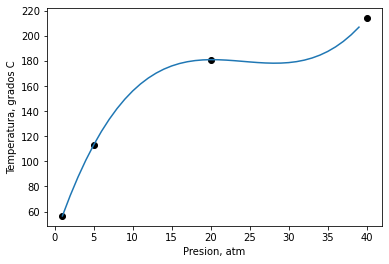

In [14]:
p = np.arange(1,40)
plt.plot(P,T, "ko")
plt.plot(p,pol(p))
plt.xlabel("Presion, atm")
plt.ylabel("Temperatura, grados C")
plt.show()

**Tarea**: Obtener manualmente el polinomio de Lagrange para los datos de $T(P)$.

|**Puntos**| 0  | 1    | 2    | 3    |
|---       |--- |---   |---   |---   |
|$T(^oC)$   |56.5| 113.0| 181.0| 214.5|
|$P(atm)$  | 1  | 5    | 20   | 40   |